# Xearch 
## Exoplanetary Laboratory
### By Jorge I. Zuluaga

In [ ]:
!pip install -Uq spiceypy astropy

In [6]:
# External modules
import spiceypy as spy
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
import pandas as pd
# Read planetary systems
exec(open('systems-full.py').read())
# Constants
deg = np.pi/180
Msun = c.M_sun.value
Mearth = c.M_earth.value
Mjup = c.M_jup.value
AU = c.au.value 
G = c.G.value
Rsun = c.R_sun.value
Rearth = c.R_earth.value
Rjup = c.R_jup.value
days = 86400
years = 365.25*days

In [7]:
# System
system = systems['51 Peg']
units = system['units'].split(', ')
UL = eval(units[4])
UM = eval(units[0])
UMP = eval(units[2])
URP = eval(units[3])
UPP = eval(units[5])
UT = np.sqrt(UL**3/(G*UM))
UV = UL/UT

In [9]:
system

{'name': '51 Peg',
 'units': 'Msun, Rsun, Mjup, Rjup, AU, days, deg',
 'star': {'mass': 1.06, 'radius': 1.15},
 'planets': [{'name': 'b',
   'method': 'Radial Velocity',
   'mass': 0.468,
   'period': 4.23,
   'radius': 1.9,
   'a': 0.052,
   'e': 0.0,
   'I': 0.0}]}

In [10]:
# System parameters
m1 = system['star']['mass']
m2 = system['planets'][0]['mass']*UMP/UM
mu = m1 + m2
a = system['planets'][0]['a']*UL/AU
T = 2*np.pi/np.sqrt(mu/a**3)
e = system['planets'][0]['e']
I = system['planets'][0]['I']*deg
# Additional parameters
q = a*(1 - e)
W = 90*deg
w = 0*deg
M = -120*deg

In [15]:
a, T, m2/mu

(0.052, 0.07235031912686919, 0.00042128480421566164)

In [20]:
Nt = 1000
ts = np.linspace(0,3.2*T,Nt)
Xs = np.zeros((Nt,6))
X1s = np.zeros((Nt,6))
X2s = np.zeros((Nt,6))
elements = [q, e, I, W, w, M, 0, mu]
for i,t in enumerate(ts):
    Xs[i] = spy.conics(elements, t)
    X1s[i] = m2/mu*Xs[i]
    X2s[i] = -m1/mu*Xs[i]

vrad_teos = X1s[:,3]*UV

In [25]:
ts

array([0.        , 0.00023175, 0.00046351, 0.00069526, 0.00092701,
       0.00115876, 0.00139052, 0.00162227, 0.00185402, 0.00208577,
       0.00231753, 0.00254928, 0.00278103, 0.00301279, 0.00324454,
       0.00347629, 0.00370804, 0.0039398 , 0.00417155, 0.0044033 ,
       0.00463506, 0.00486681, 0.00509856, 0.00533031, 0.00556207,
       0.00579382, 0.00602557, 0.00625732, 0.00648908, 0.00672083,
       0.00695258, 0.00718434, 0.00741609, 0.00764784, 0.00787959,
       0.00811135, 0.0083431 , 0.00857485, 0.00880661, 0.00903836,
       0.00927011, 0.00950186, 0.00973362, 0.00996537, 0.01019712,
       0.01042887, 0.01066063, 0.01089238, 0.01112413, 0.01135589,
       0.01158764, 0.01181939, 0.01205114, 0.0122829 , 0.01251465,
       0.0127464 , 0.01297816, 0.01320991, 0.01344166, 0.01367341,
       0.01390517, 0.01413692, 0.01436867, 0.01460042, 0.01483218,
       0.01506393, 0.01529568, 0.01552744, 0.01575919, 0.01599094,
       0.01622269, 0.01645445, 0.0166862 , 0.01691795, 0.01714

In [24]:
X1s[:,3].max(), X1s[:,3].min()

(0.0019024638265011404, -0.0019024717284861132)

(-0.05717584647986177,
 0.05717563058714697,
 -0.05500000000000001,
 0.05500000000000001)

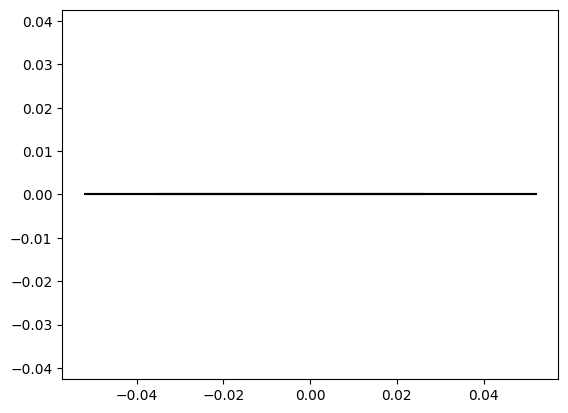

In [17]:
plt.plot(X2s[:,1],X2s[:,2],'k-')
plt.axis('equal')

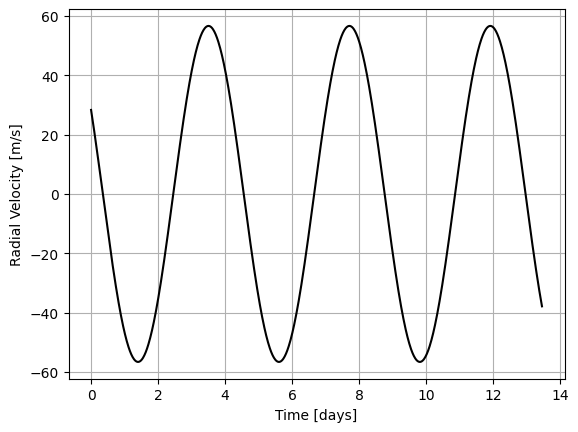

In [18]:
fig,axs = plt.subplots(1,1)
ax = axs
ax.plot(ts*UT/days,vrad_teos,'k-')
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()

In [ ]:
# Generate signal
tcad = 0.5*days/UT

tobs = np.arange(0,5.2*T,tcad)
Nt = len(tobs)
Xs = np.zeros((Nt,6))
X1s = np.zeros((Nt,6))
X2s = np.zeros((Nt,6))
for i,t in enumerate(tobs):
    Xs[i] = spy.conics([q, e, I, W, w, M, 0, mu], t)
    X1s[i] = m2/mu*Xs[i]
    X2s[i] = -m1/mu*Xs[i]

deltav = 5/UV
vrads = X1s[:,3]*UV
dvrads = 5*np.ones_like(vrads) # deltav*abs(vrads)
vrads = np.random.normal(vrads,dvrads)

In [ ]:
system['planets'][0]['name'], system['star']

('b', {'mass': 1.06, 'radius': 1.15})

Text(0.5, 1.0, '51 Peg b')

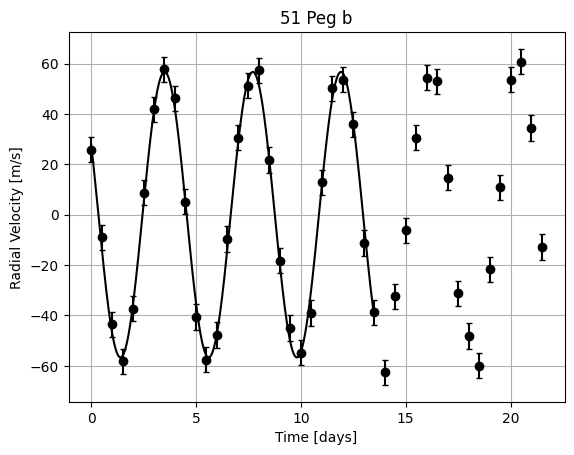

In [ ]:
fig,axs = plt.subplots(1,1)
ax = axs
ax.errorbar(tobs*UT/days,vrads,dvrads,color='k',fmt='o',capsize=2)
ax.plot(ts*UT/days,vrad_teos,'k-')
ax.set_xlabel(f"Time [{units[5]}]")
ax.set_ylabel(f"Radial Velocity [m/s]")
ax.grid()
ax.set_title(f"{system['name']} {system['planets'][0]['name']}")